* Loading the data
* Plotting Histogram of Metacritic and Fandango 
> Fandango Vlaues seems to be rounded

* 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
movies = pd.read_csv(r'E:\DQ\data\fandango\fandango_score_comparison.csv') 
movies.shape

(146, 22)

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

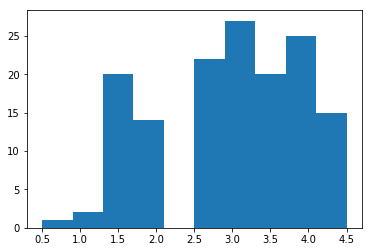

In [5]:
plt.hist(movies['Metacritic_norm_round'])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

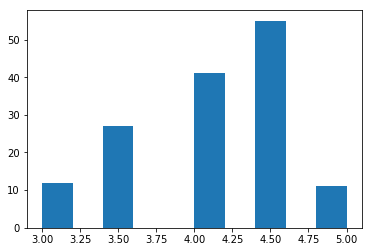

In [6]:
plt.hist(movies['Fandango_Stars'])

#### Different std in pandas vs numpy

* In a nutshell, neither is "incorrect". Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.
* To make them behave the same, pass ddof=1 to numpy.std()

* [For More](https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy)

In [7]:
f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.089041095890411
2.9726027397260273
0.5403859779787333
0.9909605613743364
4.0
3.0


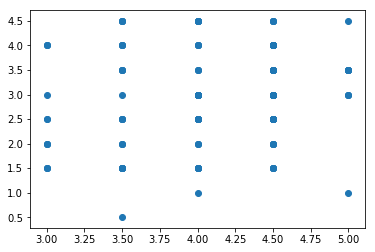

In [8]:
plt.scatter(movies['Fandango_Stars'],movies['Metacritic_norm_round'])

In [10]:
movies['fm_diff'] = abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])
movies.sort_values('fm_diff',ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [ ]:
r_value, p_value = stats.pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
print(r_value)

In [14]:
slope, intercept, r_value, p_value, stderr_slope = stats.linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(r_value)

pred_3 = 3*slope + intercept
print(pred_3)

0.178449190739
4.09170715282


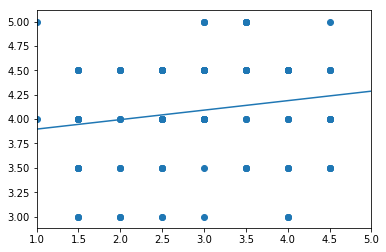

In [15]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()